# Data Collection and Preprocessing


In [68]:
import pandas as pd

# read the CSV file into a pandas dataframe
df = pd.read_csv('train.csv')
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [69]:
# Use Pandas to drop all columns (axis = 1) with NaN values
# This is a crude way of dealing with it and might be problematic to the accuracy  
df = df.dropna(axis = 1)

In [70]:
# select all columns of the object data type (which includes strings)
string_columns = df.select_dtypes(include=['object']).columns

# display the column names
print(string_columns)
print(df)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl

In [71]:
# The columns containing strings were separated in order for them to be assigned categories
#   to better integrate with the model
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

for i in string_columns:

  new = enc.fit_transform(df[[i]])

  df[[i]] = new


In [72]:
# seperation of features and target variable
y = df[['SalePrice']]
X = df.drop('SalePrice', axis=1)
print(X)    # note it now contains 61 columns (features)

        Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0        1          60       3.0     8450     1.0       3.0          3.0   
1        2          20       3.0     9600     1.0       3.0          3.0   
2        3          60       3.0    11250     1.0       0.0          3.0   
3        4          70       3.0     9550     1.0       0.0          3.0   
4        5          60       3.0    14260     1.0       0.0          3.0   
...    ...         ...       ...      ...     ...       ...          ...   
1455  1456          60       3.0     7917     1.0       3.0          3.0   
1456  1457          20       3.0    13175     1.0       3.0          3.0   
1457  1458          70       3.0     9042     1.0       3.0          3.0   
1458  1459          20       3.0     9717     1.0       3.0          3.0   
1459  1460          20       3.0     9937     1.0       3.0          3.0   

      Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0           0

# Model Selection and Training

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)


<ipython-input-73-81bf793ec0f8>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


# Model Evaluation

Mean Squared Error (MSE) and Mean Absolute Error (MAE) do *not* provide a relative understanding of the error margin of the model. 

We use the following simple methods to understand this.

In [74]:
# Convert y_test from pandas Dataframe to numpy array
arr = y_test['SalePrice'].values

# Make a list of the differences between each value of y_test and y_pred
diff = []
for i in range(len(arr)):
  c = abs(arr[i] - y_pred[i])
  diff.append(c)

print(diff)


[13415.75, 14208.299999999988, 5474.75, 12232.799999999988, 3822.640000000014, 10808.0, 100407.01000000001, 4479.399999999994, 1491.320000000007, 275.0, 13011.0, 8180.919999999998, 28258.5, 2456.709999999992, 2229.0, 2827.0, 12177.01000000001, 1017.0, 562.0, 18712.600000000006, 653.0799999999872, 10232.679999999993, 4173.5899999999965, 568.1699999999983, 4485.8399999999965, 19095.899999999994, 3620.670000000013, 32131.0, 3916.899999999994, 14003.660000000003, 5647.0, 36385.75, 18381.589999999997, 23521.0, 5415.309999999998, 3252.0, 115.26000000000931, 14011.5, 7462.739999999991, 7616.779999999999, 8056.5, 34006.48000000001, 2199.0800000000017, 108410.25, 6627.929999999993, 32036.29999999999, 396.320000000007, 667.429999999993, 71410.94, 2711.790000000008, 4632.5, 330.0, 10799.279999999999, 77128.64000000001, 4422.5, 18634.179999999993, 18673.899999999994, 24471.95000000001, 39518.390000000014, 6997.830000000002, 6585.0, 5506.5, 12198.460000000021, 26653.340000000026, 4227.739999999991,

<ipython-input-83-fbfaa442a79a>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


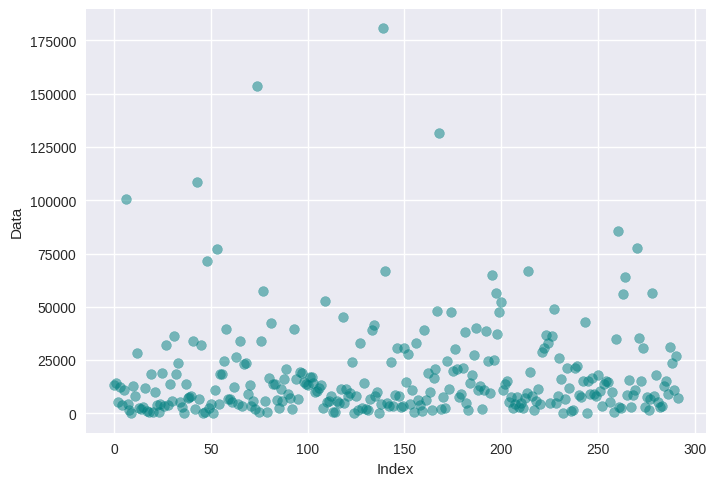

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate x-coordinates for the data using the range() function
x_coords = range(len(diff))

# Use a built-in style sheet to change the plot style
plt.style.use('seaborn')

# Create a scatter plot of the data using matplotlib
plt.scatter(x_coords, diff, s=50, c='teal', alpha=0.5)

# Add axis labels to the plot
plt.xlabel('Index')
plt.ylabel('Data')

# Show the plot
plt.show()


As can be seen from the plot, the majority of the points gather towards the bottom indicating minimal difference between the predicted and the true values of the Sale Price. 

**Outliers**:
There are a few outliers that can be attributed as anomalies or perhaps one of the columns deleted initially due to having NaN values may have played a significant role in the valuation of the anomalous homes.

In [77]:
import numpy as np

true_avg = np.average(y_test)

diff_avg = np.average(diff)

probability_of_success = 1 - (diff_avg / true_avg)

print(probability_of_success)

0.9011114295001698
